In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)}, color_codes=True)


In [2]:
ames = pd.read_csv("ames_clean.csv")
ames.drop(['Unnamed: 0'], axis=1, inplace=True)
ames.head()


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
0,909176150,856,126000,30,RL,0.0,7890,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,3,2010,WD,Normal,436 HAYWARD AVE
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,2,2009,WD,Normal,3416 WEST ST
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,11,2007,WD,Normal,320 S 2ND ST
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,5,2009,WD,Normal,1524 DOUGLAS AVE
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,11,2009,WD,Normal,2304 FILLMORE AVE


# AMES Housing Stats

In [3]:
#what columns are included? #checking the datatypes
ames.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2557 non-null   int64  
 1   GrLivArea      2557 non-null   int64  
 2   SalePrice      2557 non-null   int64  
 3   MSSubClass     2557 non-null   int64  
 4   MSZoning       2557 non-null   object 
 5   LotFrontage    2557 non-null   float64
 6   LotArea        2557 non-null   int64  
 7   Street         2557 non-null   object 
 8   Alley          2557 non-null   object 
 9   LotShape       2557 non-null   object 
 10  LandContour    2557 non-null   object 
 11  Utilities      2557 non-null   object 
 12  LotConfig      2557 non-null   object 
 13  LandSlope      2557 non-null   object 
 14  Neighborhood   2557 non-null   object 
 15  Condition1     2557 non-null   object 
 16  Condition2     2557 non-null   object 
 17  BldgType       2557 non-null   object 
 18  HouseSty

In [4]:
#lets look at the stats for numerical data
ames.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.557000e+03,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,...,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,7.136726e+08,1484.130231,177999.682049,57.755182,56.144310,10088.969104,6.048494,5.619476,1970.473602,1983.835354,...,466.598749,96.142354,45.821275,23.054361,2.533829,16.301916,1.676965,49.169730,6.147047,2007.838092
std,1.886271e+08,481.408956,74026.606260,42.906505,33.402884,8118.818809,1.353716,1.119040,29.622689,20.443916,...,207.355393,129.165857,64.581945,64.086525,25.406356,57.027863,30.475183,500.942385,2.667599,1.313075
min,5.263011e+08,334.000000,12789.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284900e+08,1112.000000,130000.000000,20.000000,40.000000,7400.000000,5.000000,5.000000,1954.000000,1965.000000,...,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354532e+08,1436.000000,159900.000000,50.000000,61.000000,9375.000000,6.000000,5.000000,1972.000000,1992.000000,...,475.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071760e+08,1734.000000,209500.000000,70.000000,78.000000,11475.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,3820.000000,625000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


from the above table, we see that:
    - SalePrice appears skewed
   

Skewness: 1.667428


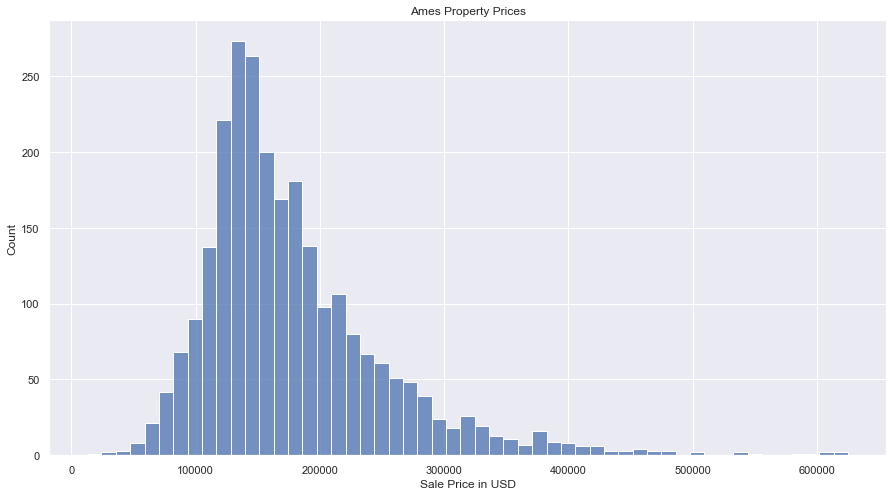

In [5]:
#lets check the skewness
print("Skewness: %f" % ames.SalePrice.skew())
#highly skewed

#histogram
sns.histplot(ames.SalePrice)
plt.title("Ames Property Prices")
plt.xlabel("Sale Price in USD")
plt.ylabel("Count")
plt.show()

# Are there any outliers present?

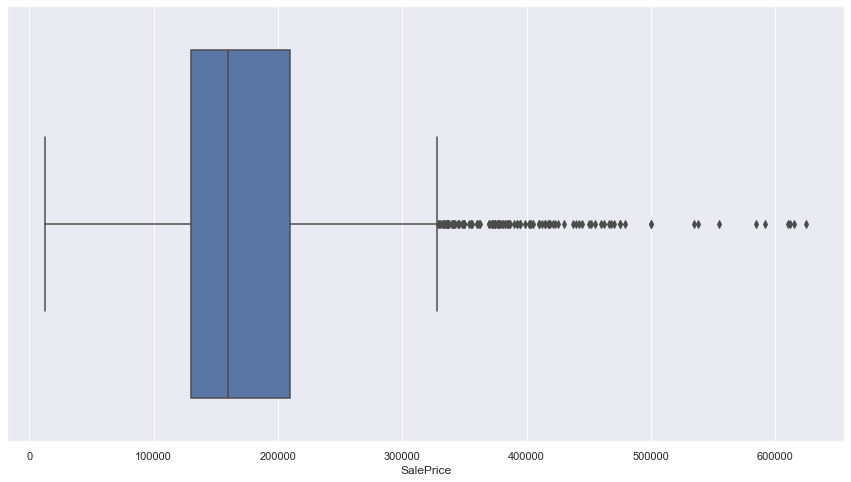

In [6]:
#saleprice outliers
sns.boxplot(x = ames.SalePrice, )
plt.show()

In [7]:
print("Skewness: %f" % ames.GrLivArea.skew())
#moderately skewed

Skewness: 0.847277


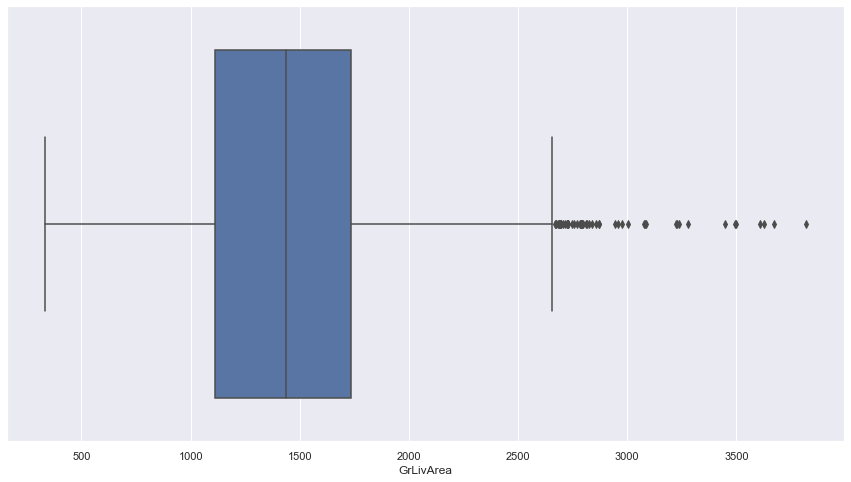

In [8]:
#GrLivArea outliers
sns.boxplot(x = ames.GrLivArea)
plt.show()

In [9]:

print("Skewness: %f" % ames.LotArea.skew())
#highly skewed


Skewness: 13.212943


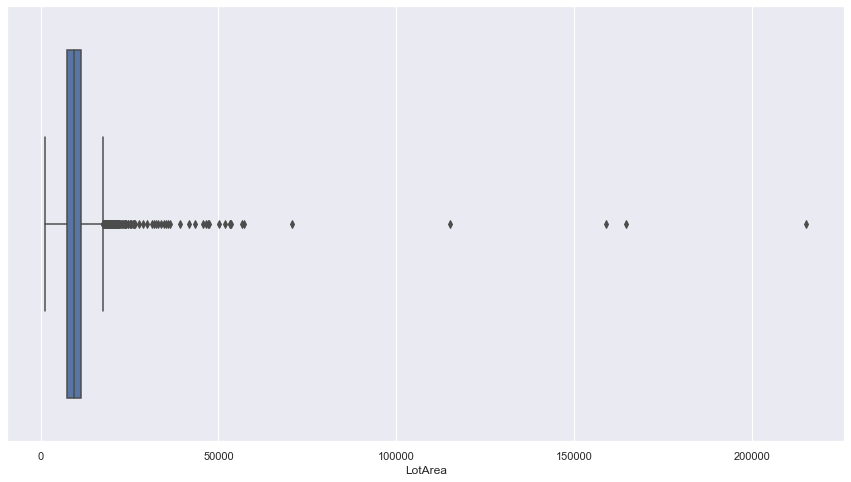

In [10]:
#LotArea outliers
sns.boxplot(x = ames.LotArea)
plt.show()

In [11]:
ames.shape

(2557, 82)

In [12]:
def show_outliers(df,columns,num_sd):
    for col in columns:
        print('Working on column: {}'.format(col))
        outliers = (df[np.abs(stats.zscore(df[col])) > num_sd]).sort_values(col)
    return outliers
ames_copy = ames

def drop_outliers(df,columns,num_sd):
    for col in columns:
        print('Working on column: {}'.format(col))
        new_df = df[np.abs(stats.zscore(df[col])) < num_sd]
    return new_df


so as not to skew my predictions, I have decided to remove outliers that are more than 3 SDs from the mean
helpful resource: https://stephenallwright.com/remove-outliers-pandas/
& also: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [13]:
#lets look at how many price outliers there are
price_outliers = show_outliers(ames_copy, ['SalePrice'], 3)
price_outliers

Working on column: SalePrice


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
1167,528390100,2448,402000,60,RL,52.0,46589,Pave,NoAlley,IR2,...,0,NoPool,NoFence,NoMisc,0,7,2009,WD,Normal,2901 CYPRESS CIR
1135,528321010,2794,403000,60,RL,174.0,15138,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,7,2009,WD,Normal,3318 RIDGETOP RD
809,528108130,2020,404000,20,RL,95.0,12350,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,5,2009,WD,Normal,3107 STOCKBURY ST
629,528327010,2855,405000,60,RL,0.0,9233,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,3,2006,WD,Normal,3124 ALMOND RD
2450,528386040,3238,410000,50,RL,56.0,14720,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,3,2010,WD,Normal,3001 HEMLOCK CIR
2291,916382100,2036,410000,20,RL,113.0,13438,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,7,2009,WD,Normal,3125 WHITETAIL LN
1306,528340030,3078,410000,60,RL,89.0,10557,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,7,2007,WD,Normal,3031 BAYBERRY RD
953,528166120,2668,412500,60,RL,110.0,13688,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal,3301 FOXLEY DR
311,528114010,1868,415000,20,RL,120.0,14780,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,6,2006,WD,Normal,3334 WESTON DR
385,905427030,3672,415000,75,RL,60.0,19800,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,12,2006,WD,Normal,3226 OAKLAND ST


looks like SalePrice outliers are over $400,000

In [14]:
#dropping outliers over 3 SD away from mean
ames_copy = drop_outliers(ames_copy,['SalePrice'],3)
ames_copy.shape

Working on column: SalePrice


(2514, 82)

In [15]:
#lets look at how many GrLivArea outliers there are
grliv_outliers = show_outliers(ames_copy, ['GrLivArea'], 3)
grliv_outliers

Working on column: GrLivArea


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
163,527325070,2872,272000,60,RL,0.0,12227,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,7,2008,WD,Normal,1904 BUCHANAN DR
1672,533130170,2872,285000,50,RL,85.0,10678,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,4,2007,WD,Normal,2430 RIDGETOP CIR
273,533350090,2944,150000,60,RL,0.0,24572,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,6,2008,WD,Family,1712 AMHERST DR
242,528150110,2956,342000,60,RL,99.0,13069,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,8,2007,WD,Normal,3215 HARRISON RD
2377,535425010,2978,242000,80,RL,96.0,11275,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,6,2010,WD,Normal,1926 GEORGE ALLEN AVE
298,533206020,3005,280750,160,FV,32.0,2880,Pave,Pave,Reg,...,0,NoPool,NoFence,NoMisc,0,7,2009,WD,Normal,2819 BRISTOL DR
1192,909179020,3082,197000,75,RL,102.0,15863,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,8,2009,WD,Normal,601 HAYWARD AVE
2492,904101070,3086,200500,50,RL,138.0,18030,Pave,NoAlley,IR1,...,0,NoPool,MnPrv,NoMisc,0,3,2007,WD,Normal,2824 ROSS RD
571,906402200,3222,320000,60,RL,90.0,12376,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal,926 IDAHO AVE
519,909282030,3447,381000,50,RL,0.0,14100,Pave,NoAlley,IR1,...,0,NoPool,GdWo,NoMisc,0,5,2008,WD,Normal,2116 COUNTRY CLUB BLVD


looks like GrLivArea outliers are around 3000 SF

In [16]:
#dropping outliers over 3 SD away from mean
ames_copy = drop_outliers(ames_copy,['GrLivArea'],3)
ames_copy.shape

Working on column: GrLivArea


(2502, 82)

In [17]:
#lets look at how many LotArea outliers there are
area_outliers = show_outliers(ames_copy, ['LotArea'], 3)
area_outliers

Working on column: LotArea


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
1059,923229140,1676,196000,20,RL,61.0,33983,Pave,NoAlley,IR1,...,0,NoPool,GdPrv,NoMisc,0,5,2007,WD,Normal,501 GARDEN RD
1779,527250040,1056,145000,190,RL,100.0,34650,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,1,2006,WD,Normal,1121 TOP O HOLLOW RD 1123
2191,917425190,1572,186700,20,RL,50.0,35133,Grvl,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,3312 DARTMOOR LN
1039,906426090,1582,190000,20,RL,0.0,36500,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,6,2006,WD,Normal,4720 DOVER DR
1410,905401045,1363,241500,20,RL,73.0,39104,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,4,2008,WD,Normal,516 OLIVER CIR
522,527226040,1424,155000,190,RL,195.0,41600,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,11,2007,WD,Normal,4014 DAWES DR
1993,923202220,2034,130000,20,RL,200.0,43500,Pave,NoAlley,Reg,...,561,TA,GdPrv,NoMisc,0,6,2007,WD,Normal,3312 S DUFF AVE
326,905425125,2358,240000,50,RL,75.0,45600,Pave,NoAlley,IR2,...,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,3421 OAKLAND ST
836,527276040,1488,133000,20,RL,0.0,47280,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,7,2008,WD,Family,3805 DAWES DR
344,533350050,1842,385000,20,RL,68.0,50271,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,11,2006,WD,Normal,3110 KINGMAN RD


In [18]:
#dropping outliers over 3 SD away from mean
ames_copy = drop_outliers(ames_copy,['LotArea'],3)
ames_copy.shape

Working on column: LotArea


(2483, 82)

In [19]:
#lets look at how many House Quality outliers there are
show_outliers(ames_copy,['OverallQual'],3)


Working on column: OverallQual


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr
908,534450090,334,39300,20,RL,50.0,5000,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,1,2007,WD,Normal,1501 SUMMIT AVE
1222,904301375,904,61000,30,RL,0.0,10020,Pave,NoAlley,IR1,...,0,NoPool,NoFence,NoMisc,0,3,2009,WD,Normal,520 FOREST GLEN
2135,909101330,498,35000,30,RL,60.0,8088,Pave,Grvl,Reg,...,0,NoPool,NoFence,NoMisc,0,2,2006,ConLD,Normal,202 STATE AVE
1537,909175080,438,60000,30,RL,60.0,8400,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,1,2009,WD,Normal,507 HAYWARD AVE
1105,535383060,599,59000,30,RL,90.0,5400,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,6,2009,WD,Normal,117 13TH ST
2253,903231060,800,60000,30,RM,51.0,6120,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,1,2009,ConLw,Normal,1109 MARSTON AVE
895,910206010,845,68104,50,RM,64.0,11067,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,3,2007,WD,Normal,328 S RUSSELL AVE
207,905228050,660,63900,20,RL,0.0,9000,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,6,2009,WD,Normal,1101 IOWA AVE
638,911175430,480,35311,20,C (all),50.0,9000,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,10,2006,WD,Abnorml,313 S 4TH ST
423,902207130,832,12789,30,RM,68.0,9656,Pave,NoAlley,Reg,...,0,NoPool,NoFence,NoMisc,0,6,2010,WD,Abnorml,931 MAXWELL AVE


In [20]:
print("Skewness: %f" % ames.OverallQual.skew())
#although there are 17 outliers, the level of skewness is still low


Skewness: 0.202699


In [21]:
ames = ames_copy
new_line = '\n'
price = ames['SalePrice']
print(f'Most Common Price: {new_line}{price.mode()}')
print(new_line)

size_related = ames.filter(regex='SF$|Area$')
print(f'Size Summary: {new_line}{size_related.describe()}')
print(new_line)
print(f'Size Modes: {new_line}{size_related.mode(axis=0, numeric_only=True, dropna=True)}')


Most Common Price: 
0    135000
dtype: int64


Size Summary: 
         GrLivArea       LotArea   MasVnrArea    BsmtUnfSF  TotalBsmtSF  \
count  2483.000000   2483.000000  2483.000000  2483.000000  2483.000000   
mean   1455.190093   9459.080950    89.845751   538.128474  1017.030608   
std     444.943753   3925.406021   158.408834   423.396713   388.816432   
min     334.000000   1300.000000     0.000000     0.000000     0.000000   
25%    1098.500000   7309.500000     0.000000   215.500000   784.000000   
50%    1422.000000   9278.000000     0.000000   448.000000   970.000000   
75%    1716.000000  11250.000000   145.000000   783.500000  1240.000000   
max    2840.000000  33120.000000  1600.000000  2336.000000  3206.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF   GarageArea   WoodDeckSF  \
count  2483.000000  2483.000000   2483.000000  2483.000000  2483.000000   
mean   1121.194925   330.167942      3.827225   457.878776    92.171969   
std     346.079982   413.131979     4

In [22]:
#find mode

print(f'Most frequent year built:', ames['YearBuilt'].mode())
print(new_line)
print(f'Most frequent remodel year:', ames['YearRemodAdd'].mode())
print(new_line)
print(f'Most frequent year sold:', ames['YrSold'].mode())
print(new_line)
print(f'Most frequent month sold:', ames['MoSold'].mode())
print(new_line)
print(f'Most Frequent Condition:', ames['OverallCond'].mode(),
      'Most Frequent Quality:', ames['OverallQual'].mode() )
print(new_line)

Most frequent year built: 0    2005
dtype: int64


Most frequent remodel year: 0    1950
dtype: int64


Most frequent year sold: 0    2007
dtype: int64


Most frequent month sold: 0    6
dtype: int64


Most Frequent Condition: 0    5
dtype: int64 Most Frequent Quality: 0    5
dtype: int64




# What is variables are correlated?

<AxesSubplot:>

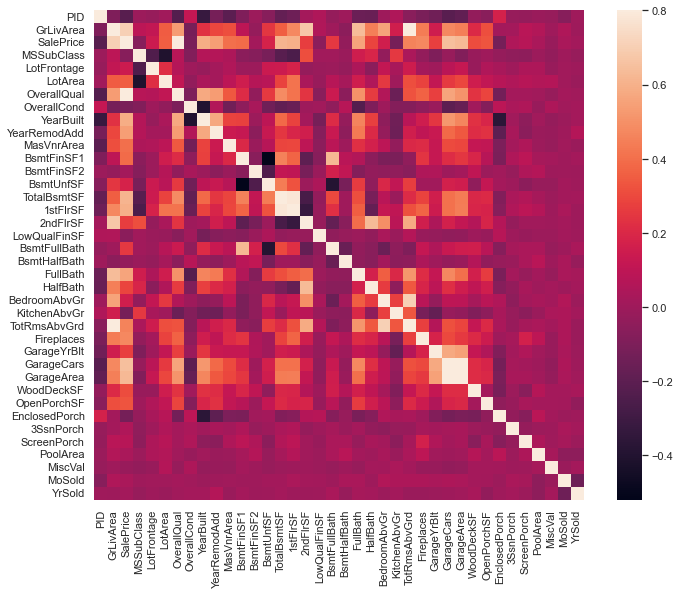

In [23]:
#correlation matrix
corr = ames.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

based on the correlation matrix, there appears to be a strong correlation between Sales Price and Ground Living Area, Overall Quality, Total Basement SF, 1st Floor SF, Garage Cars, and Garage Area, with Overall Quality having the strongest relationship

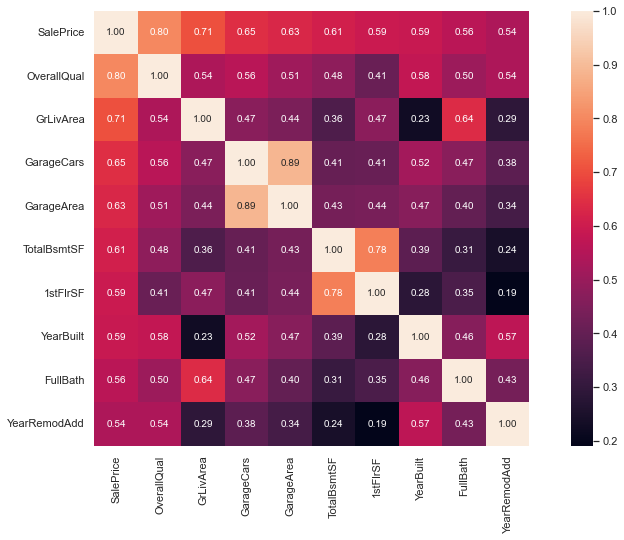

In [24]:
#lets look at the strength of the correlation
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
corr_m = np.corrcoef(ames[cols].values.T)
sns.set(font_scale=1.0)
sns.heatmap(corr_m, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

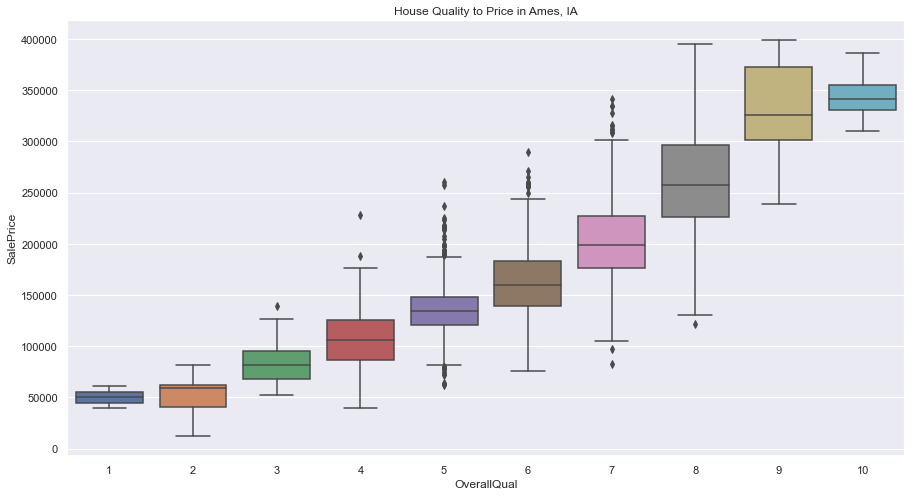

In [25]:
#box plot overallqual/saleprice
sns.boxplot(x=ames.OverallQual, y=ames.SalePrice)
plt.title("House Quality to Price in Ames, IA")
plt.show()

as expected, the higher the quality of home, the higher the price

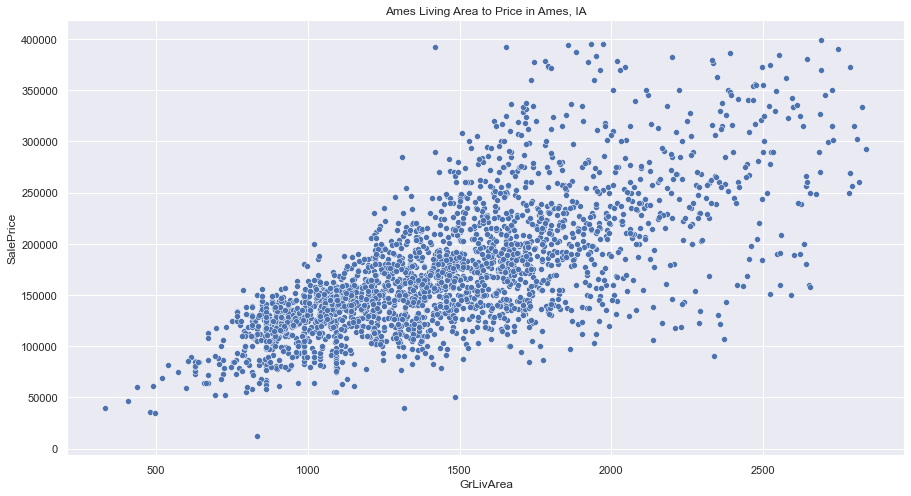

In [26]:
#scatter plot grlivarea/saleprice
sns.scatterplot(x = ames.GrLivArea, y =ames.SalePrice, palette = "blue")
plt.title("Ames Living Area to Price in Ames, IA")
plt.show()

as expected, the size of the listing does appear to impact the price

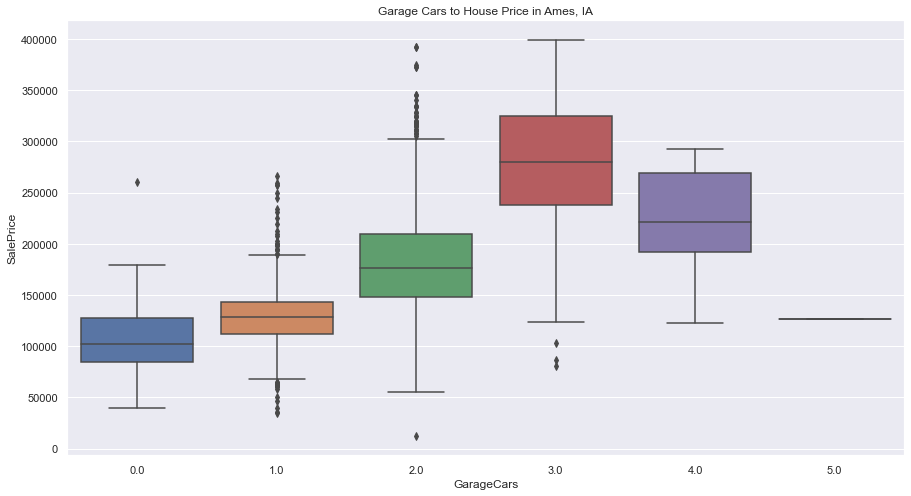

In [27]:
#box plot GarageCars/saleprice
sns.boxplot(x=ames.GarageCars, y=ames.SalePrice)
plt.title("Garage Cars to House Price in Ames, IA")
plt.show()


it appears the number garage cars adds value to listings, but this dips after 3 cars

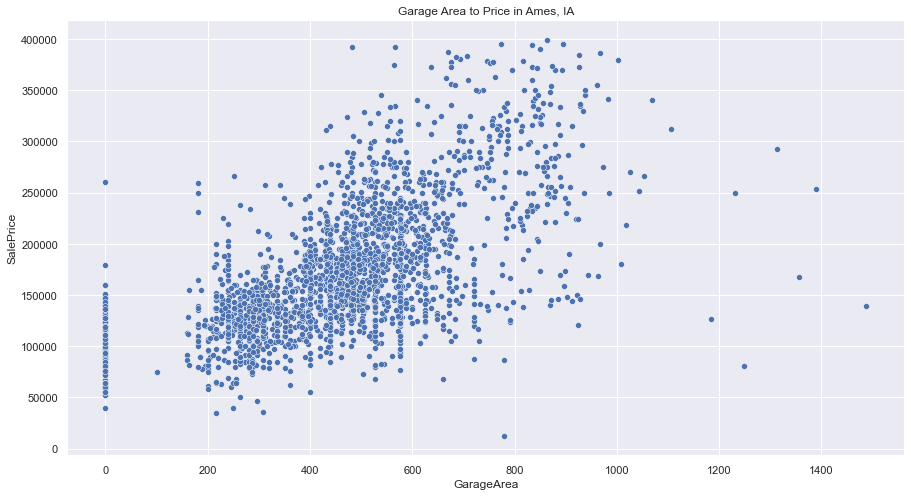

In [28]:
#scatter plot 1stflrsf/saleprice
sns.scatterplot(x = ames.GarageArea, y =ames.SalePrice)
plt.title("Garage Area to Price in Ames, IA")
plt.show()


there is a similar trend with garage area

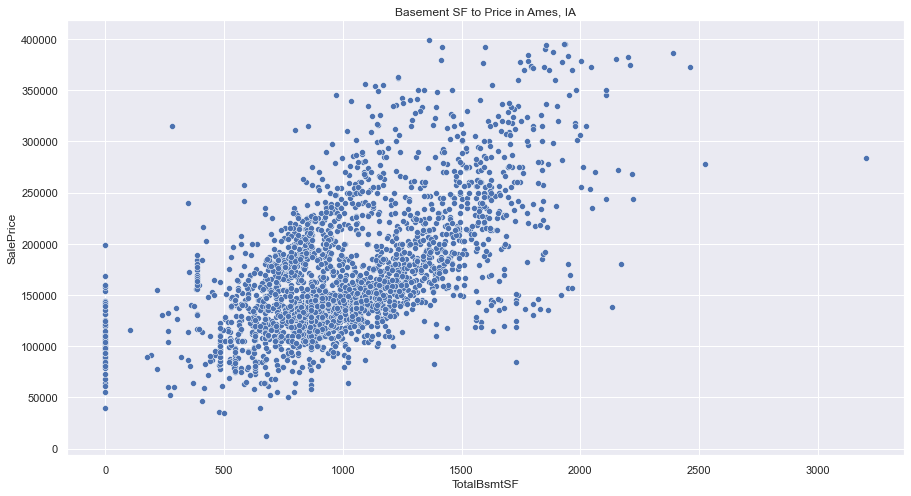

In [29]:
#scatter plot totalbsmtsf/saleprice
sns.scatterplot(x = ames.TotalBsmtSF, y =ames.SalePrice)
plt.title("Basement SF to Price in Ames, IA")
plt.show()

basement SF does add value to the listing, but there are outliers

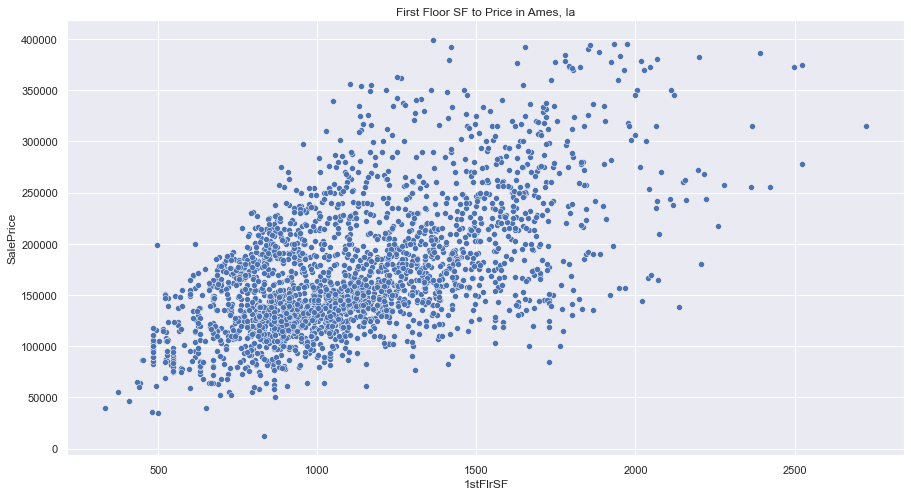

In [30]:
#scatter plot 1stflrsf/saleprice
sns.scatterplot(x = ames['1stFlrSF'], y =ames.SalePrice)
plt.title("First Floor SF to Price in Ames, Ia")
plt.show()